# "Bivariate" BMM for n = 3, ..., N models

### Author: Alexandra Semposki

### Date: 11 October 2022

Unlike the last notebook, Bivariate_Test, this one focusses on the N model case for this SAMBA mixing technique. Hence, it is no longer truly bivariate, but multivariate. This will only mix the models together in the Gaussian format without employing any GPs (yet). 

In [1]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.ticker import AutoMinorLocator

matplotlib.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
})

In [2]:
import sys
sys.path.append('../Taweret')
from models.samba_models import *
from mix.gaussian import *

In [3]:
#list of models to mix
orders = [3,5,7]
model_1 = loworder(order=orders[0])
model_2 = loworder(order=orders[1])
model_3 = highorder(order=orders[2])

models = [model_1, model_2, model_3]
print(models, type(models))

[<models.samba_models.loworder object at 0x000001F3384055E0>, <models.samba_models.loworder object at 0x000001F338405640>, <models.samba_models.highorder object at 0x000001F338405280>] <class 'list'>


In [4]:
#predict functions for the plot
g = np.linspace(1e-6, 1.0, 100)
predict = []

for i in range(len(models)):
    predict.append(models[i].predict(g))

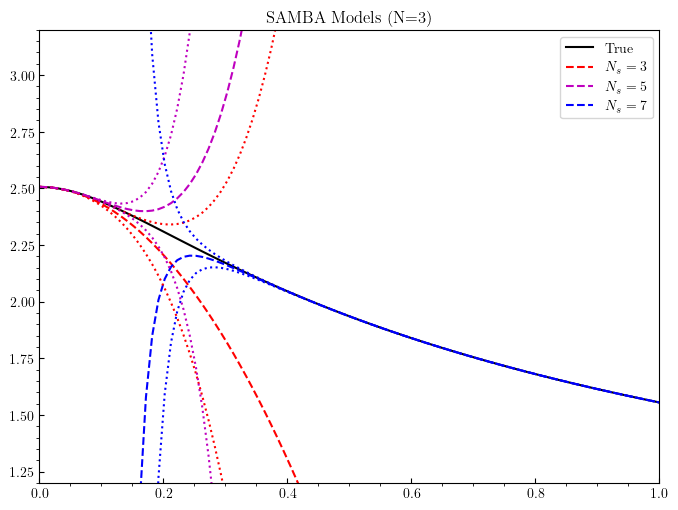

In [5]:
#plot to check choices
fig = plt.figure(figsize=(8,6), dpi=100)
ax = plt.axes()
ax.set_xlim(0.0,1.0)
ax.set_ylim(1.2,3.2)
ax.tick_params(axis='x', direction='in')
ax.tick_params(axis='y', direction='in')
ax.locator_params(nbins=8)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_title('SAMBA Models (N=3)')

#truth
ax.plot(g, true_model().predict(g)[0].flatten(), 'k', label='True')

#colour wheel
colors = ['r', 'm', 'b']
lines = ['dashed', 'dotted']

#models
for i in range(len(predict)):
    ax.plot(g, predict[i][0].flatten(), color=colors[i], linestyle=lines[0], label=r'$N_s={}$'.format(orders[i]))

#uncertainties
for i in range(len(predict)):
    ax.plot(g, predict[i][0].flatten() - predict[i][1].flatten(), color=colors[i], linestyle=lines[1])
    ax.plot(g, predict[i][0].flatten() + predict[i][1].flatten(), color=colors[i], linestyle=lines[1])

ax.legend()

In [6]:
#call bivariate method and mix
mixed = multivariate(g, models)
mixed_mean, mixed_intervals = mixed.mixing_prediction()

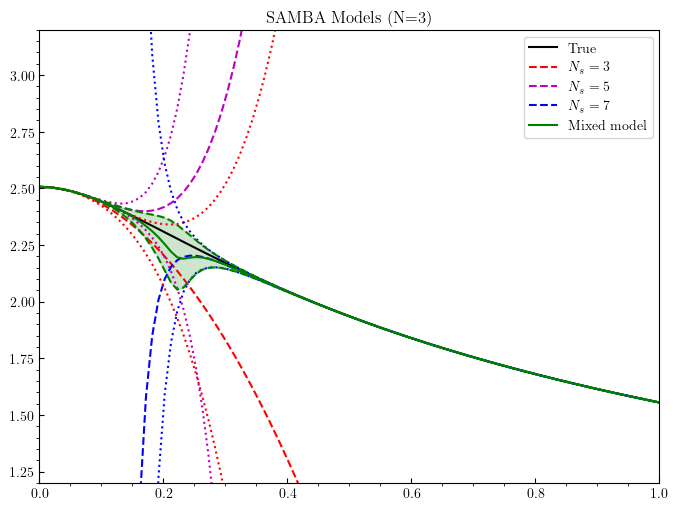

In [7]:
#plot to check choices
fig = plt.figure(figsize=(8,6), dpi=100)
ax = plt.axes()
ax.set_xlim(0.0,1.0)
ax.set_ylim(1.2,3.2)
ax.tick_params(axis='x', direction='in')
ax.tick_params(axis='y', direction='in')
ax.locator_params(nbins=8)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_title('SAMBA Models (N=3)')

#truth
ax.plot(g, true_model().predict(g)[0].flatten(), 'k', label='True')

#colour wheel
colors = ['r', 'm', 'b']
lines = ['dashed', 'dotted']

#models
for i in range(len(predict)):
    ax.plot(g, predict[i][0].flatten(), color=colors[i], linestyle=lines[0], label=r'$N_s={}$'.format(orders[i]))

#uncertainties
for i in range(len(predict)):
    ax.plot(g, predict[i][0].flatten() - predict[i][1].flatten(), color=colors[i], linestyle=lines[1])
    ax.plot(g, predict[i][0].flatten() + predict[i][1].flatten(), color=colors[i], linestyle=lines[1])

ax.legend()

#mean and intervals
ax.plot(g, mixed_mean, 'g', label='Mixed model')
ax.plot(g, mixed_intervals[:,0], 'g--')
ax.plot(g, mixed_intervals[:,1], 'g--')
ax.fill_between(g, mixed_intervals[:,0], mixed_intervals[:,1], color='green', alpha=0.2)

ax.legend()

This looks great! We do need to verify with SAMBA to ensure correctness, since we built SAMBA for >2 models in the "Bivariate" BMM code. 